# <span style="color:orange"> Analysis of wind speeds in Ireland, and the potential impacts on the windfarm industry.<span>
*By Laura Lyons*
***

This project was submitted as part of the module Programming for Data Analytics 24-25: 4369., Higher Diploma in Science, Data Analytics


## <span style="color:orange"> Table of contents<span>
***
1. [Introduction](#10-introduction)
2. [Method](#2-methods)\
   2.1. [Prerequisites/ Imports](#21-prerequisites-imports)\
   2.2. [Load the Data](#23-load-the-data)
3. [Results](#30-results)\
   3.1 [Data Overiew](#32-data-clean-up)\
   3.2 [Data Clean-up](#32-data-clean-up)\
   3.3 [Data Analysis](#33-data-analysis)\
   3.4 [Data Correlation](#34-data-correlation)\
   3.5 [Regression Analysis](#35-regression-analysis)
4. [Discussion and Conclusion](#4-discussion-and-conclusions)
5. [References](#references)

## <span style="color:orange"> **1.    Introduction**<span>
***
Wind-generated energy is becoming increasingly important in Ireland for several key reasons:

1. **Renewable Energy Targets and Climate Action**: Ireland is committed to reducing its carbon emissions and increasing the share of renewable energy in its electricity generation. Wind energy plays a central role in achieving these climate targets. As a clean, renewable resource, wind energy helps to cut down on greenhouse gas emissions and reduces Ireland's reliance on fossil fuels. The Irish government has committed to producing 80% of the country’s electricity from renewable sources by 2030, with wind energy at the forefront. [(Government of Ireland, Climate Action Plan, 2023)](https://www.gov.ie/en/publication/7bd8c-climate-action-plan-2023/).

2. **EU Support and Policy Alignment**: As part of its commitments to the European Union’s Green Deal and energy transition, Ireland is receiving EU funding and policy support to invest in renewable energy infrastructure. Wind energy is a key element of this strategy, as it helps the EU meet its collective climate goals and ensure a transition to a low-carbon economy.The EU's clean energy goals include major investments in wind energy, and Ireland is a key player in achieving these targets. [(European Commission, Sustainable finance)](https://ec.europa.eu/info/business-economy-euro/banking-and-finance/sustainable-finance_en).

3. **Energy Security**: Wind energy helps improve Ireland’s energy security by reducing its dependency on imported fossil fuels. Diversifying our energy supply enhances energy security by reducing both demand for imported fossil fuels and also exposure to price variations.[(SEAI: Energy Security in Ireland, 2020)](https://www.seai.ie/sites/default/files/publications/Energy-Security-in-Ireland-2020-.pdf).

4. **Abundant Wind Resources**: Ireland's geographic location offers significant potential to harness wind energy,Ireland benefits from strong, consistent winds, particularly along its coastal areas. This makes it an ideal location for  wind farms.  with offshore wind especially promising due to stronger and more reliable winds at sea.

In summary, wind energy is becoming increasingly vital in Ireland due to its environmental benefits, abundant natural resources, potential for economic growth, and alignment with both national and EU energy goals.

## <span style="color:orange"> **2.    Methods** <span>
***

The approach used to anayise the data set for this project, involved analysing the data by generating a data overview, 'cleaning-up'the data, analysing the data, including any significant correlations and/or regressions. 

#### <span style="color:orange">2.1    Prerequisites/ Imports <span>

A number of imports were used to help with the data analysis and visualisation.

1. **sys**: This [module](https://docs.python.org/3/library/sys.html) provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.
1. **Pandas**: was used for the DataFrame structure and for storing, manipulating and working with structured data. It allows us to investigate CSV files, amongst other features.
1. **NumPy**: as it creates efficient data structures for dealing with numerical data in python. Reference Lecture 5. Module Principles of Data Analytics.
1. **Matplotlib.pyplot:** for creating plots.
1. **Seaborn**: matplotlib sub-library for creating attractive data visualisation.
1. **datetime**: supplies classes for [manipulating dates and times](https://docs.python.org/3/library/datetime.html).
1. **[Cartopy](https://anaconda.org/anaconda/cartopy#:~:text=Cartopy%20is%20a%20Python%20package%20designed%20for%20geospatial,to%20produce%20maps%20and%20other%20geospatial%20data%20analyses.)** is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats as stats
import matplotlib.colors as mcolors
from scipy.stats import zscore
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from windrose import WindroseAxes

***
#### <span style="color:orange"> 2.3   Load the Data<span>
The wind data set was loaded from [Met Eireanns' historical data](https://www.met.ie/climate/available-data/historical-data). 

Three weather stations from Cork were choosen for the analysis (Figure 2.1).
1. Roches Point, a coastal weather stations located on the south coast of Cork.
2. Sherkin Island, a weather stations located on an island, off West Cork.
3. Cork Airport, located inland, close to Cork City. 

(Originally I had choosen Moore Park weather station, located in the midlands of North Cork, however ater inital analysis, I noticed that this weather station only started collecting data in 2023, which would limit comparission between weather stations and also the reliability of predictive statistics).

Once the data was loaded, it allowed the analysis/investigation of the data to begin. It was necessary to remove the first 17/23 rows of the files, as these rows did not contain data of interest to this analysis.

Figure 2.1: The locations of the weather stations analyzed in this study.


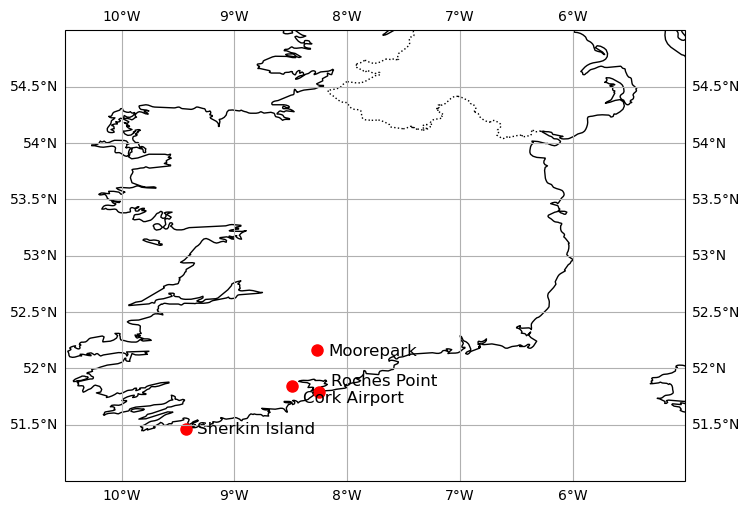

In [2]:
# Create a map of the weather station locations 
# (called down from the `plot_weather-stations.py` script)
%run scripts/plot_weather_stations.py

In [3]:
# Import the data and merge the dataframes (assisted by ChatGpT, to merge  along the 'date' column)
# Read the first CSV file and add a new column to indicate the source file
dfrp = pd.read_csv('data/roches_pt.csv', header=0, skiprows=17, low_memory=False)
dfrp['source'] = 'roches_pt'

# Read the second CSV file and add a new column to indicate the source file
dfs = pd.read_csv('data/sherkin.csv', header=0, skiprows=17, low_memory=False)
dfs['source'] = 'sherkin'

# Read the third CSV file and add a new column to indicate the source file
dfca = pd.read_csv('data/cork_airport.csv', header=0, skiprows=23, low_memory=False)
dfca['source'] = 'cork_airport'

In [4]:
# Drop the columns that are not needed, ie Vapour pressure and relative humidity.
dfrp = dfrp.drop(columns=['vappr', 'rhum']) 
dfs = dfs.drop(columns=['vappr', 'rhum']) 
dfca = dfca.drop(columns=['vappr', 'rhum'])

## <span style="color:orange"> **3. Results** <span>
***

#### <span style="color:orange">  3.1    Data Overview <span>

An overview of the data was complete, so that we could decifer the type and number of variables present. 

There are 5 variables for each of the weather stations,
1. Date (Formatt day, month, year, hour, minute)
1. Rain (mm)
1. Temperature (<sup>0</sup>C)
1. Mean Wind Speed (kt)
1. Predominant Wind Direction (deg)

,the majority of which were orginially of variable type, object (Table 3.2). All necessary data columns were converted to integers, to help with the analysis of the data (Table 3.3).

<span style="color:orange"> 3.1.1  Missing Data. <span>

Handling missing data is important, as some machine learning algorithms do not support data with missing values [(Bankar, 2023)](https://medium.com/analytics-vidhya/supervised-learning-with-scikit-learn-df617631216a). The most commen method used to deal with missing values is imputation, which can be defined as:<div align="center">"*A process to assign or substitute the missing row/ column value with the dedired/calculated value*" [(Chauhan, 2023)](https://towardsai.net/p/machine-learning/in-depth-handling-imputation-techniques-of-missing-values-in-feature-transformation)</div >

Imputation techniques include:
1. Statistic: where a statistical value is calculated for each column (*i.e.* the mean), and this is then used to replace the missing values within that column.
1. Mean: where an educated guess is used to produced a number to replace the missing values within each column.
1. Mode: This is where the mean values of the entire column in question is used to replace the missing values.
1. Uni-variate: The missing data is replaced by the mean/median/random value (Bankar, 2023).

For this analysis, we are going to replace the missing values with '0', because on this occassion there will be a lot of emphasis put on temporal and space trends within these datasets.


In [5]:
# Print the head of each DataFrame
print ('Table 3.1: The first two rows of each of the three weather station dataframes')
print("\nRoches point weather station")
print(dfrp.head(2))
print("\nSherkin weather station")
print(dfs.head(2))
print("\nCork Airport weather station")
print(dfca.head(2))

Table 3.1: The first two rows of each of the three weather station dataframes

Roches point weather station
               date rain  temp wdsp wddir     source
0  01/12/1955 01:00    0  10.7   16   170  roches_pt
1  01/12/1955 02:00  2.9   9.8   11   190  roches_pt

Sherkin weather station
               date rain  temp wdsp wddir   source
0  01/05/2004 00:00       10.9             sherkin
1  01/05/2004 01:00    0  10.8   14   350  sherkin

Cork Airport weather station
               date rain  temp  wdsp  wddir        source
0  01/01/1962 01:00       -1.1    14    340  cork_airport
1  01/01/1962 02:00       -1.1    10    340  cork_airport


In [6]:
# Get the data types of each DataFrame
dfrp_dtypes = dfrp.dtypes.rename('Roches Point')
dfs_dtypes = dfs.dtypes.rename('Sherkin Island')
dfca_dtypes = dfca.dtypes.rename('Cork Airport')

# Concatenate the data types into a single DataFrame
dtypes_combined = pd.concat([dfrp_dtypes, dfs_dtypes, dfca_dtypes], axis=1)

# Rename the columns
dtypes_combined.columns = ['Roches Point', 'Sherkin Island', 'Cork Airport']

# Print the combined data types
print('Table 3.2: The data types present at each weather station\n')
print(dtypes_combined)

Table 3.2: The data types present at each weather station

       Roches Point Sherkin Island Cork Airport
date         object         object       object
rain         object         object       object
temp         object         object      float64
wdsp         object         object        int64
wddir        object         object        int64
source       object         object       object


In [7]:
# Convert columns from strings to floats
# Roches Point weather station
dfrp['rain'] = pd.to_numeric(dfrp['rain'], errors='coerce')
dfrp['temp'] = pd.to_numeric(dfrp['temp'], errors='coerce')
dfrp['wdsp'] = pd.to_numeric(dfrp['wdsp'], errors='coerce')
dfrp['wddir'] = pd.to_numeric(dfrp['wddir'], errors='coerce')

# Sherkin Islandweather station
dfs['rain'] = pd.to_numeric(dfs['rain'], errors='coerce')
dfs['temp'] = pd.to_numeric(dfs['temp'], errors='coerce')
dfs['wdsp'] = pd.to_numeric(dfs['wdsp'], errors='coerce')
dfs['wddir'] = pd.to_numeric(dfs['wddir'], errors='coerce')

# Cork Airport weather station
dfca['rain'] = pd.to_numeric(dfca['rain'], errors='coerce')
dfca['temp'] = pd.to_numeric(dfca['temp'], errors='coerce')
dfca['wdsp'] = pd.to_numeric(dfca['wdsp'], errors='coerce')
dfca['wddir'] = pd.to_numeric(dfca['wddir'], errors='coerce')

# Get the data types of each DataFrame
dfrp_dtypes = dfrp.dtypes.rename('Roches Point')
dfs_dtypes = dfs.dtypes.rename('Sherkin Island')
dfca_dtypes = dfca.dtypes.rename('Cork Airport')

# Concatenate the data types into a single DataFrame
dtypes_combined = pd.concat([dfrp_dtypes, dfs_dtypes, dfca_dtypes], axis=1)

# Rename the columns
dtypes_combined.columns = ['Roches Point', 'Sherkin Island', 'Cork Airport']

# Print the combined data types
print('Table 3.3: The data types present at each weather station after conversion to numeric\n')
print(dtypes_combined)

Table 3.3: The data types present at each weather station after conversion to numeric

       Roches Point Sherkin Island Cork Airport
date         object         object       object
rain        float64        float64      float64
temp        float64        float64      float64
wdsp        float64        float64        int64
wddir       float64        float64        int64
source       object         object       object


In [17]:
# Let deal with empty and missing values.
# Replace empty cells with '0'
dfrp.fillna(0, inplace=True)
dfs.fillna(0, inplace=True)
dfca.fillna(0, inplace=True)  

# Replace infinite values with '0'
dfrp.replace([np.inf, -np.inf], 0, inplace=True)
dfs.replace([np.inf, -np.inf], 0, inplace=True)
dfca.replace([np.inf, -np.inf], 0, inplace=True)

#### <span style="color:orange">  3.2   Data Clean-up<span>

Many statistical tests rely on the assumption that data is distributed according to a normal or Gaussian curve, and if the data is not normal these tools won't work ([Had2Know, 2024](https://www.had2know.org/academics/test-for-normality-statistics.html)).

*Wind direction will not be analyised for normality nor in the summary statistics as wind direction is reported as an angle in degrees (0-360<sup>0</sup>), where 0 or 360 represents a wind blowing from a northerly direction. To correctly deal with this scale trigonometric functions must be used to handle the angles, which is beyond the scope of this analysis [(Grange, 2014)](https://www.researchgate.net/publication/262766424_Technical_note_Averaging_wind_speeds_and_directions). Dominate wind direction will be analyised using wind rose graphs, later in this analysis.*

Several methods can be used to check if the data is normally distributed:

1. **Visual grphical analysis**: Histograms (Figure: 3.1) and Q-Q plot (Figure 3.2)
1. **Statistical Test**: Kolmogorov- Smirnov Test (Figures: ). If the p-value is greater than 0.05, the data is considered to be normally distributed.

I will use a combination of these techniques across all variables to assess data normality.

##### <span style="color:orange"> 3.2.1 Testing for normality. <span>
<span style="color:orange"> Histograms <span>

From Figure 3.1 we can see that:
- For the Roches Point weather station, both variables, temperature and wind speed appear non-normal as they are bi-modal.
- For the Sherkin weather station, once again both variables appear non-normal, with the temparature data being bi-modal and the wind speed data is skewed to the left.
- For the Cort Airport weather station, the variable temperature appears normally distributed, but the variable wind speed appears non- normal as it is skewed to the left.

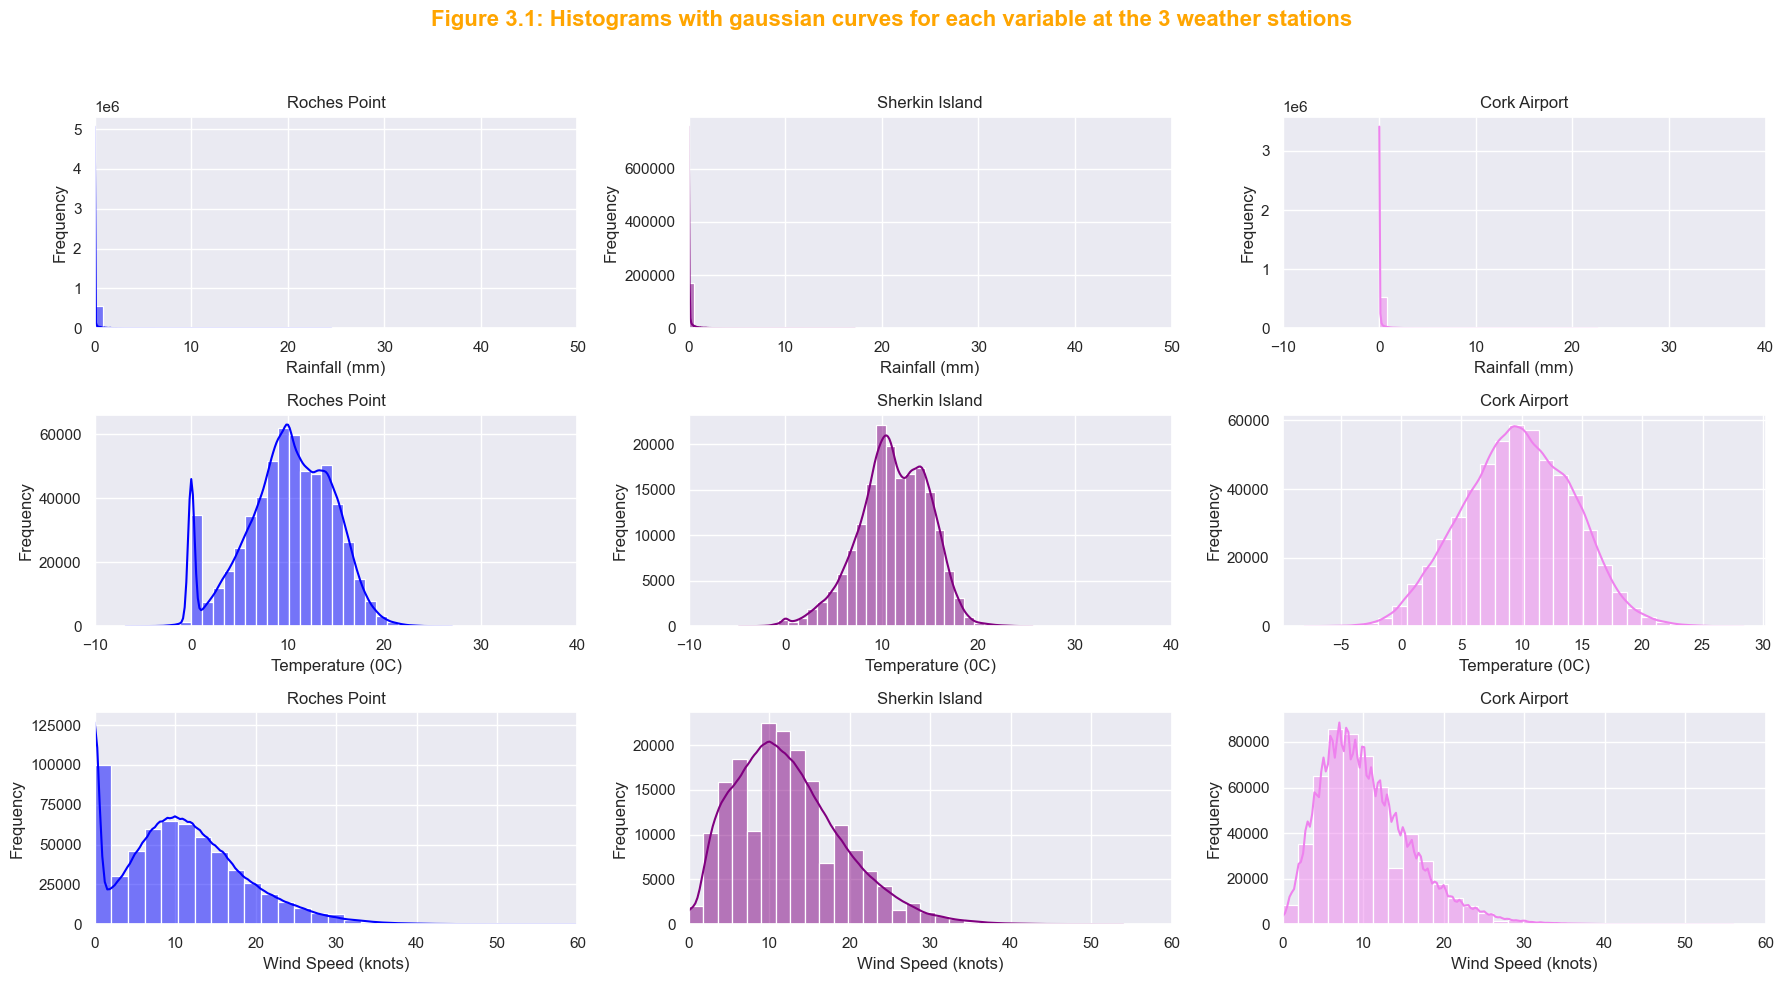

In [9]:
# Plotting histograms to assess data normality.
# (called down from the `plot_histograms.py`script), as the originally code is very long.
import sys
sys.path.append('scripts')

import plot_histograms as ph
ph.plot_histograms(dfrp, dfs, dfca)


<span style="color:orange"> Q-Q Plots <span>

From Figure: 3.2, we can see that all variables, excluding temperature and vapour pressure from the Cork Airport weather station, appears to be non-normal. Statistical analysis will be performed to validate these conclusions.

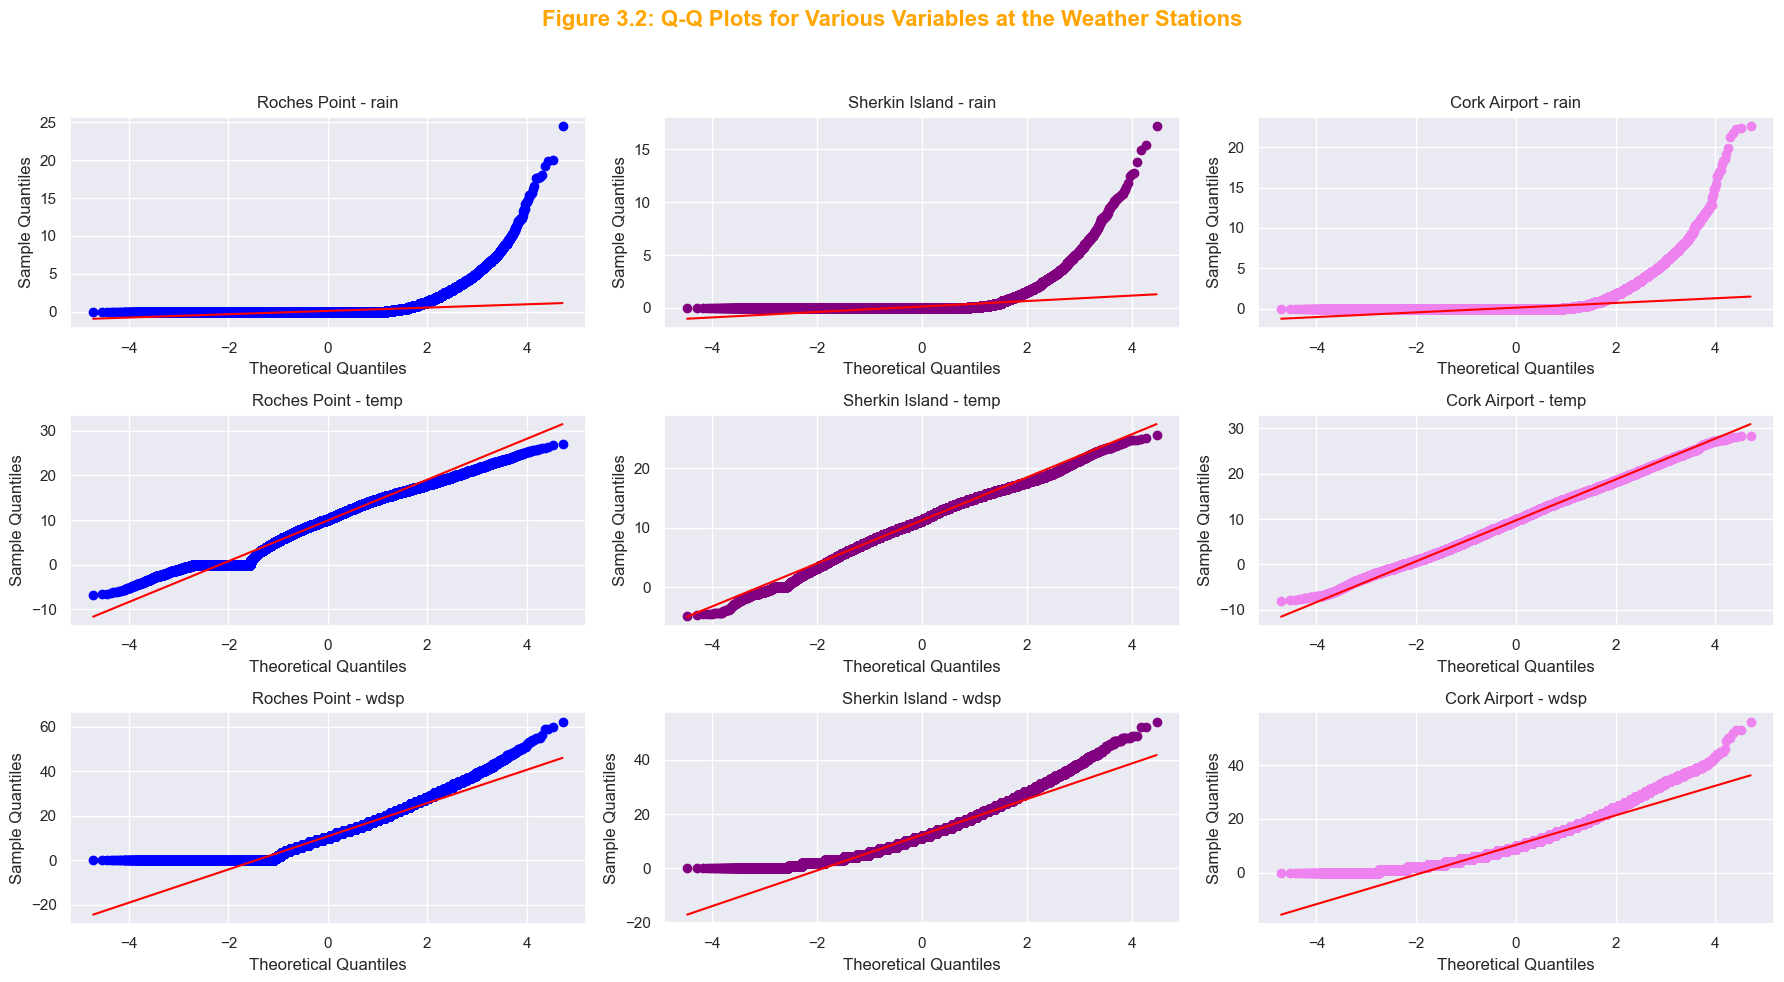

In [10]:
# Generating Q-Q Plots for the variables from the weather stations, to assess normality.
# Set the theme for the plots
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize=(18, 10))

# List of variables
variables = ['rain', 'temp', 'wdsp']
dataframes = {'Roches Point': dfrp, 'Sherkin Island': dfs, 'Cork Airport': dfca}

# Colors for the plots
colors = ['blue', 'purple', 'violet']

# Plot Q-Q plots for each variable in each DataFrame
for i, var in enumerate(variables):
    for j, (name, df) in enumerate(dataframes.items()):
        ax = axs[i, j]
        res = stats.probplot(df[var], dist="norm", plot=ax)
        ax.get_lines()[0].set_color(colors[j])  # Set color for the data points
        ax.get_lines()[1].set_color('red')  # Set color for the fit line
        ax.set_title(f'{name} - {var}')
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')

# Add an overall title to the figure
fig.suptitle('Figure 3.2: Q-Q Plots for Various Variables at the Weather Stations', fontsize=16, fontweight='bold', color='orange')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<span style="color:orange"> Kolmogorov-Smirnov Test.<span>

The Kolmogorov-Smirnov Test was choosen as it is more suitable for larger sample sizes. 

From table 3.4, we can verify that all variables, across all weather stations are **not normally distributed**.

In [11]:
# Perform Kolmogorov-Smirnov test and return results
def ks_test(df, column, alpha=0.05):
    ks_stat, ks_p = stats.kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))
    is_normal = ks_p > alpha
    return ks_stat, ks_p, 'Normal' if is_normal else 'Not Normal'

# List of columns to test
columns_to_test = ['rain', 'temp', 'wdsp']

# DataFrames dictionary
dataframes = {'Roches Point': dfrp, 'Sherkin Island': dfs, 'Cork Airport': dfca}

# Initialize results dictionary
results = {df_name: {col: {} for col in columns_to_test} for df_name in dataframes.keys()}

# Perform the test and store results
for df_name, df in dataframes.items():
    for column in columns_to_test:
        ks_stat, ks_p, normality = ks_test(df, column)
        results[df_name][column] = {'Statistic': ks_stat, 'p-value': ks_p, 'Normality': normality}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Display the results
print('Table 3.4: The results of the Kolmogorov-Smirnov test for normality')
print(results_df)

Table 3.4: The results of the Kolmogorov-Smirnov test for normality
                     Statistic        p-value   Normality
Roches Point   rain   0.462584   0.000000e+00  Not Normal
               temp   0.042165   0.000000e+00  Not Normal
               wdsp   0.079249   0.000000e+00  Not Normal
Sherkin Island rain   0.412782   0.000000e+00  Not Normal
               temp   0.032016  3.870605e-161  Not Normal
               wdsp   0.080347   0.000000e+00  Not Normal
Cork Airport   rain   0.425835   0.000000e+00  Not Normal
               temp   0.018011  7.648071e-156  Not Normal
               wdsp   0.100417   0.000000e+00  Not Normal


<span style="color:red"> **The variable of most interest is wind speed, therefore we I will focus on this variable going forward**<span>

<span style="color:orange"> Outliers<span>

Lets check if the presence of outliers is skewing our data (Figure: 3.3).

If outliers are present and can be removed, this may help with achieving a normal data set. The variable of most interest going forward is wind speed, therefore we I will focus on this variable going forward. There are a number of methods that can be used to identify outliers:

1. **Z-score Method**. From the results below (table 3.5), if we removed all data points with a z-score of greater than 3, we would be removing far to much fo the data set, so I increased the Z-score threshold to 4, but the result was not improved. The z-score method is not ideal for data sets that display skewed distribution, so we will now look at the IQR method ([Preet A, 2022](https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/)).
1. **Interquartile Range (IQR) method**. 
1. **Visual Inspection, using boxplots**.

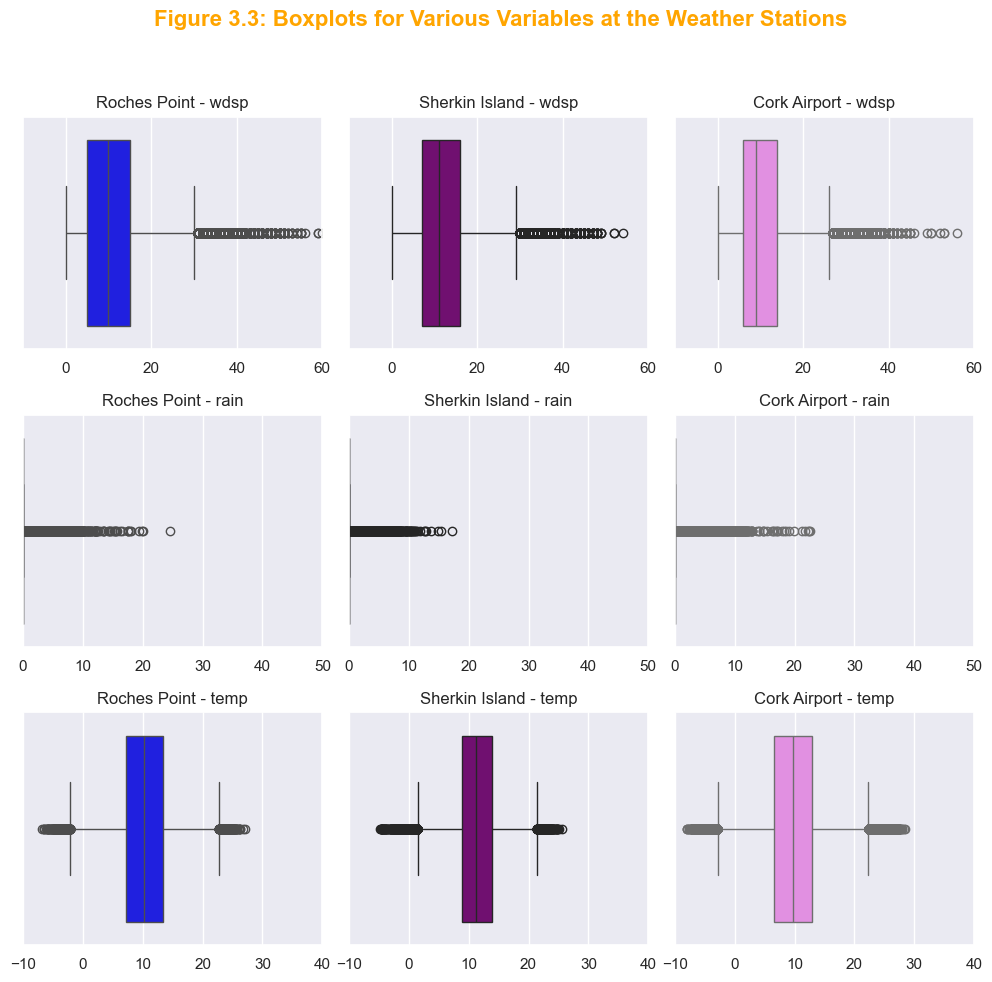

In [13]:
# Checking for outliers using boxplots
# Set the theme for the plots
sns.set_theme(style="darkgrid")

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# List of variables
variables = ['wdsp', 'rain', 'temp']
dataframes = {'Roches Point': dfrp, 'Sherkin Island': dfs, 'Cork Airport': dfca}

# Colors for the boxplots
colors = ['blue', 'purple', 'violet']

# Plot boxplots for each variable in each DataFrame
for i, var in enumerate(variables):
    for j, (name, df) in enumerate(dataframes.items()):
        sns.boxplot(x=df[var], ax=axs[i, j], color=colors[j])
        axs[i, j].set_title(f'{name} - {var}')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
        if var == 'wdsp':
            axs[i, j].set_xlim(-10, 60)
        elif var == 'rain':
            axs[i, j].set_xlim(0, 50)
        elif var == 'temp':
            axs[i, j].set_xlim(-10, 40)


# Add an overall title to the figure
fig.suptitle('Figure 3.3: Boxplots for Various Variables at the Weather Stations', fontsize=16, fontweight='bold', color='orange')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [14]:
# Removing the outliers highlighted using the Z-score method, re check for normality.
# Function to identify and remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(zscore(df[columns]))
    outliers = (z_scores > threshold).any(axis=1)
    df_cleaned = df[~outliers]
    return df_cleaned

# List of columns to check for outliers
columns_to_check = ['wdsp', 'rain', 'temp']

# Remove outliers in each DataFrame
dfrp_cleaned = remove_outliers_zscore(dfrp, columns_to_check)
dfs_cleaned = remove_outliers_zscore(dfs, columns_to_check)
dfca_cleaned = remove_outliers_zscore(dfca, columns_to_check)

# Check for normality after removing outliers
# Perform Kolmogorov-Smirnov test and return results
def ks_test(df, column, alpha=0.05):
    ks_stat, ks_p = stats.kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))
    is_normal = ks_p > alpha
    return ks_stat, ks_p, 'Normal' if is_normal else 'Not Normal'

# DataFrames dictionary
dataframes = {'Roches Point': dfrp_cleaned, 'Sherkin Island': dfs_cleaned, 'Cork Airport': dfca_cleaned}

# Initialize results dictionary
results = {df_name: {col: {} for col in columns_to_test} for df_name in dataframes.keys()}
# Perform the test and store results
for df_name, df in dataframes.items():
    for column in columns_to_test:
        ks_stat, ks_p, normality = ks_test(df, column)
        results[df_name][column] = {'Statistic': ks_stat, 'p-value': ks_p, 'Normality': normality}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Display the results
print('Table 3.5: The results of the Kolmogorov-Smirnov test for normality after removing outliers, using the Z-score method')
print(results_df)

Table 3.5: The results of the Kolmogorov-Smirnov test for normality after removing outliers, using the Z-score method
                     Statistic        p-value   Normality
Roches Point   rain   0.496895   0.000000e+00  Not Normal
               temp   0.041897   0.000000e+00  Not Normal
               wdsp   0.075673   0.000000e+00  Not Normal
Sherkin Island rain   0.454366   0.000000e+00  Not Normal
               temp   0.034400  6.384899e-180  Not Normal
               wdsp   0.077414   0.000000e+00  Not Normal
Cork Airport   rain   0.465114   0.000000e+00  Not Normal
               temp   0.020158  1.771236e-189  Not Normal
               wdsp   0.094470   0.000000e+00  Not Normal


In [18]:
# Removing the outliers highlighted using the IQR method, re check for normality.
# Function to identify and remove outliers using IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    df_cleaned = df[~outliers]
    return df_cleaned

# List of columns to check for outliers
columns_to_check = ['wdsp', 'rain', 'temp']

# Remove outliers in each DataFrame
dfrp_cleaned = remove_outliers_iqr(dfrp, columns_to_check)
dfs_cleaned = remove_outliers_iqr(dfs, columns_to_check)
dfca_cleaned = remove_outliers_iqr(dfca, columns_to_check)

# Check for normality after removing outliers
# Perform Kolmogorov-Smirnov test and return results
def ks_test(df, column, alpha=0.05):
    ks_stat, ks_p = stats.kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))
    is_normal = ks_p > alpha
    return ks_stat, ks_p, 'Normal' if is_normal else 'Not Normal'

# DataFrames dictionary
dataframes = {'Roches Point': dfrp_cleaned, 'Sherkin Island': dfs_cleaned, 'Cork Airport': dfca_cleaned}

# Initialize results dictionary
results = {df_name: {col: {} for col in columns_to_test} for df_name in dataframes.keys()}
# Perform the test and store results
for df_name, df in dataframes.items():
    for column in columns_to_test:
        ks_stat, ks_p, normality = ks_test(df, column)
        results[df_name][column] = {'Statistic': ks_stat, 'p-value': ks_p, 'Normality': normality}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Display the results
print('Table 3.6: The results of the Kolmogorov-Smirnov test for normality after removing outliers using IQR')
print(results_df)

c:\Users\Laura\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Table 3.6: The results of the Kolmogorov-Smirnov test for normality after removing outliers using IQR
                     Statistic        p-value   Normality
Roches Point   rain        NaN            NaN  Not Normal
               temp   0.040979   0.000000e+00  Not Normal
               wdsp   0.078002   0.000000e+00  Not Normal
Sherkin Island rain        NaN            NaN  Not Normal
               temp   0.037048  3.651631e-172  Not Normal
               wdsp   0.075019   0.000000e+00  Not Normal
Cork Airport   rain        NaN            NaN  Not Normal
               temp   0.022626  6.787069e-202  Not Normal
               wdsp   0.097715   0.000000e+00  Not Normal


<span style="color:orange"> Data transformation.<span>

A the data is clearly, non-normal, the next step is to transform the data, and re-check for normality.

In [19]:
# Function to log transform specified columns
def log_transform(df, columns):
    df_log = df.copy()
    for column in columns:
        df_log[column] = np.log(df_log[column] + 1)  # Adding 1 to avoid log(0)
    return df_log

# Function to square root transform specified columns
def sqrt_transform(df, columns):
    df_sqrt = df.copy()
    for column in columns:
        df_sqrt[column] = np.sqrt(df_sqrt[column])
    return df_sqrt

# Function to Box-Cox transform specified columns
def boxcox_transform(df, columns):
    df_boxcox = df.copy()
    for column in columns:
        df_boxcox[column], _ = boxcox(df_boxcox[column] + 1)  # Adding 1 to avoid log(0)
    return df_boxcox

# Function to Yeo-Johnson transform specified columns
def yeojohnson_transform(df, columns):
    pt = PowerTransformer(method='yeo-johnson')
    df_yeojohnson = df.copy()
    for column in columns:
        df_yeojohnson[column] = pt.fit_transform(df_yeojohnson[[column]])
    return df_yeojohnson

# Specify the columns to transform
columns_to_transform = ['wdsp', 'rain', 'temp']

# Apply transformations to each DataFrame
dfrp_log = log_transform(dfrp, columns_to_transform)
dfs_log = log_transform(dfs, columns_to_transform)
dfca_log = log_transform(dfca, columns_to_transform)

dfrp_sqrt = sqrt_transform(dfrp, columns_to_transform)
dfs_sqrt = sqrt_transform(dfs, columns_to_transform)
dfca_sqrt = sqrt_transform(dfca, columns_to_transform)

dfrp_boxcox = boxcox_transform(dfrp, columns_to_transform)
dfs_boxcox = boxcox_transform(dfs, columns_to_transform)
dfca_boxcox = boxcox_transform(dfca, columns_to_transform)

dfrp_yeojohnson = yeojohnson_transform(dfrp, columns_to_transform)
dfs_yeojohnson = yeojohnson_transform(dfs, columns_to_transform)
dfca_yeojohnson = yeojohnson_transform(dfca, columns_to_transform)

c:\Users\Laura\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Laura\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Laura\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Laura\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Laura\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Data must be positive.

Re-test the data for normality using the Kolmogorov-Smirnov test and return results, for the **log-transformed** data (Table 3.7).

In [59]:
# Perform Kolmogorov-Smirnov test and return results on the log-transformed data.
def ks_test(df, column, alpha=0.05):
    ks_stat, ks_p = stats.kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))
    is_normal = ks_p > alpha
    return ks_stat, ks_p, 'Normal' if is_normal else 'Not Normal'

# List of columns to test
columns_to_test = ['wdsp']

# DataFrames dictionary
dataframes = {'Roches Point': dfrp_log, 'Sherkin Island': dfs_log, 'Cork Airport': dfca_log}

# Initialize results dictionary
results = {df_name: {col: {} for col in columns_to_test} for df_name in dataframes.keys()}

# Perform the test and store results
for df_name, df in dataframes.items():
    for column in columns_to_test:
        ks_stat, ks_p, normality = ks_test(df, column)
        results[df_name][column] = {'Statistic': ks_stat, 'p-value': ks_p, 'Normality': normality}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Display the results
print('Table 3.7: The results of the Kolmogorov-Smirnov test for normality on log transformed data')
print(results_df)

Table 3.7: The results of the Kolmogorov-Smirnov test for normality on log transformed data
                     Statistic  p-value   Normality
Roches Point   wdsp   0.182668      0.0  Not Normal
Sherkin Island wdsp   0.089691      0.0  Not Normal
Cork Airport   wdsp   0.074606      0.0  Not Normal


Re-test the data for normality using the Kolmogorov-Smirnov test and return results, for the **square root-transformed** data (Table 3.8).

In [60]:
# Function to perform Kolmogorov-Smirnov test on square root transformed data
def ks_test(df, column, alpha=0.05):
    ks_stat, ks_p = stats.kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))
    is_normal = ks_p > alpha
    return ks_stat, ks_p, 'Normal' if is_normal else 'Not Normal'

# List of columns to test
columns_to_test = ['wdsp']

# DataFrames dictionary
dataframes = {'Roches Point': dfrp_sqrt, 'Sherkin Island': dfs_sqrt, 'Cork Airport': dfca_sqrt}

# Initialize results dictionary
results = {df_name: {col: {} for col in columns_to_test} for df_name in dataframes.keys()}

# Perform the test and store results
for df_name, df in dataframes.items():
    for column in columns_to_test:
        ks_stat, ks_p, normality = ks_test(df, column)
        results[df_name][column] = {'Statistic': ks_stat, 'p-value': ks_p, 'Normality': normality}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Display the results
print('Table 3.8: The results of the Kolmogorov-Smirnov test for normality on square root transformed data')
print(results_df)

Table 3.8: The results of the Kolmogorov-Smirnov test for normality on square root transformed data
                     Statistic        p-value   Normality
Roches Point   wdsp   0.124361   0.000000e+00  Not Normal
Sherkin Island wdsp   0.040243  2.223795e-254  Not Normal
Cork Airport   wdsp   0.048040   0.000000e+00  Not Normal


Re-test the data for normality using the Kolmogorov-Smirnov test and return results, for the **Boxcox-transformed** data (Table 3.9).

In [61]:
# Function to perform Kolmogorov-Smirnov test on Boxcox transformed data    
def ks_test(df, column, alpha=0.05):
    ks_stat, ks_p = stats.kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))
    is_normal = ks_p > alpha
    return ks_stat, ks_p, 'Normal' if is_normal else 'Not Normal'

# List of columns to test
columns_to_test = ['wdsp']

# DataFrames dictionary
dataframes = {'Roches Point': dfrp_boxcox, 'Sherkin Island': dfs_boxcox, 'Cork Airport': dfca_boxcox}

# Initialize results dictionary
results = {df_name: {col: {} for col in columns_to_test} for df_name in dataframes.keys()}

# Perform the test and store results
for df_name, df in dataframes.items():
    for column in columns_to_test:
        ks_stat, ks_p, normality = ks_test(df, column)
        results[df_name][column] = {'Statistic': ks_stat, 'p-value': ks_p, 'Normality': normality}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Display the results
print('Table 3.9: The results of the Kolmogorov-Smirnov test for normality on Boxcox transformed data')
print(results_df)

Table 3.9: The results of the Kolmogorov-Smirnov test for normality on Boxcox transformed data
                     Statistic        p-value   Normality
Roches Point   wdsp   0.095478   0.000000e+00  Not Normal
Sherkin Island wdsp   0.036370  7.733456e-208  Not Normal
Cork Airport   wdsp   0.043474   0.000000e+00  Not Normal


Re-test the data for normality using the Kolmogorov-Smirnov test and return results, for the **Yeo-Johnson-transformed** data (Table 3.9).

In [62]:
# Function to perform Kolmogorov-Smirnov test on yeo-johnson transformed data
def ks_test(df, column, alpha=0.05):
    ks_stat, ks_p = stats.kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))
    is_normal = ks_p > alpha
    return ks_stat, ks_p, 'Normal' if is_normal else 'Not Normal'

# List of columns to test
columns_to_test = ['wdsp']

# DataFrames dictionary
dataframes = {'Roches Point': dfrp_yeojohnson, 'Sherkin Island': dfs_yeojohnson, 'Cork Airport': dfca_yeojohnson}

# Initialize results dictionary
results = {df_name: {col: {} for col in columns_to_test} for df_name in dataframes.keys()}

# Perform the test and store results
for df_name, df in dataframes.items():
    for column in columns_to_test:
        ks_stat, ks_p, normality = ks_test(df, column)
        results[df_name][column] = {'Statistic': ks_stat, 'p-value': ks_p, 'Normality': normality}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Display the results
print('Table 3.9: The results of the Kolmogorov-Smirnov test for normality on Yeo-Johnson transformed data')
print(results_df)

Table 3.9: The results of the Kolmogorov-Smirnov test for normality on Yeo-Johnson transformed data
                     Statistic        p-value   Normality
Roches Point   wdsp   0.095478   0.000000e+00  Not Normal
Sherkin Island wdsp   0.036370  7.732606e-208  Not Normal
Cork Airport   wdsp   0.043474   0.000000e+00  Not Normal


<span style="color:red"> As the data is still non- normal, after transformation, we will proceed with non-parametric tests for the data analysis of these datasets. <span>

<span style="color:red"> **The variable of most interest is wind speed, therefore we I will focus on this variable going forward**<span>

***
#### <span style="color:orange"> 3.3    Data Analysis <span>

<span style="color:orange"> Descriptive statistics. <span>

Descriptive statistics utilise both categorical and numerical (quantitative) variables. The categorical variables can be used to subdivde the numerical variables and can often help in defining trends and anomolies. For this analysis, descriptive analys was only complete on the numerical data. 

The summary statitics species for this analysis were:

- Count   
- Mean  
- Standard Deviation  
- Minimum 
- 50% 
- Maximum.

Summary statistics can be useful when generating plots, as it will aid in defining the maximum and minimum values

In [63]:
# Roches Point weather station
dfrp_dropped = dfrp.drop(columns=['date','source'])
summary_dfrp= dfrp_dropped.describe().round(2).drop(['25%', '75%']) # round to 2 decimal places
print('Table 3.10: Summary statistics for all the weather stations' )
print('\nRoches Point weather station')
print(summary_dfrp)

# Sherkin Island weather station
dfs_dropped = dfs.drop(columns=['date','source'])
summary_dfs= dfs_dropped.describe().round(2).drop(['25%', '75%'])
print('\nSherkin Island weather station' )
print(summary_dfs)

# Cork Airport weather station
dfca_dropped = dfca.drop(columns=['date','source'])
summary_dfca= dfca_dropped.describe().round(2).drop(['25%', '75%'])
print('\nCork Airport weather station' )
print(summary_dfca)

Table 3.10: Summary statistics for all the weather stations

Roches Point weather station
            rain       temp       wdsp      wddir
count  585551.00  585551.00  585551.00  585551.00
mean        0.10       9.94      10.74     188.15
std         0.47       4.61       7.62     112.80
min         0.00      -6.80       0.00       0.00
50%         0.00      10.20      10.00     210.00
max        24.50      27.00      62.00     360.00

Sherkin Island weather station
            rain       temp       wdsp      wddir
count  180457.00  180457.00  180457.00  180457.00
mean        0.13      11.23      12.33     197.55
std         0.50       3.64       6.71      91.16
min         0.00      -4.80       0.00       0.00
50%         0.00      11.20      11.00     220.00
max        17.20      25.60      54.00     360.00

Cork Airport weather station
            rain       temp       wdsp      wddir
count  551520.00  551520.00  551520.00  551520.00
mean        0.14       9.70      10.34     216.8

<span style="color:orange"> Dominate wind direction. <span>

Windrose charts were created to help visualise the dominate wind direction. This would be useful for windfarms and it would help decide the best placement and orientation of the wind turbines.

From table 3.4, 3,5 and 3,6 and figure: , we can see that:
- For Roches Point weather station, the average wind speed was 10.74 kts (min= 0.0 kts, max = 62.0 kts), with the dominate wind directions being northerly.
- For Sherkin weather station, the average wind speed was 12.63 kts (min= 0.0 kts, max = 54.0 kts), with the dominate wind directions being westerly.
- For Cork Airport weather station, the average wind speed was 10.34 kts (min= 0.0 kts, max = 56.0 kts), with the dominate wind directions being south-westerly.

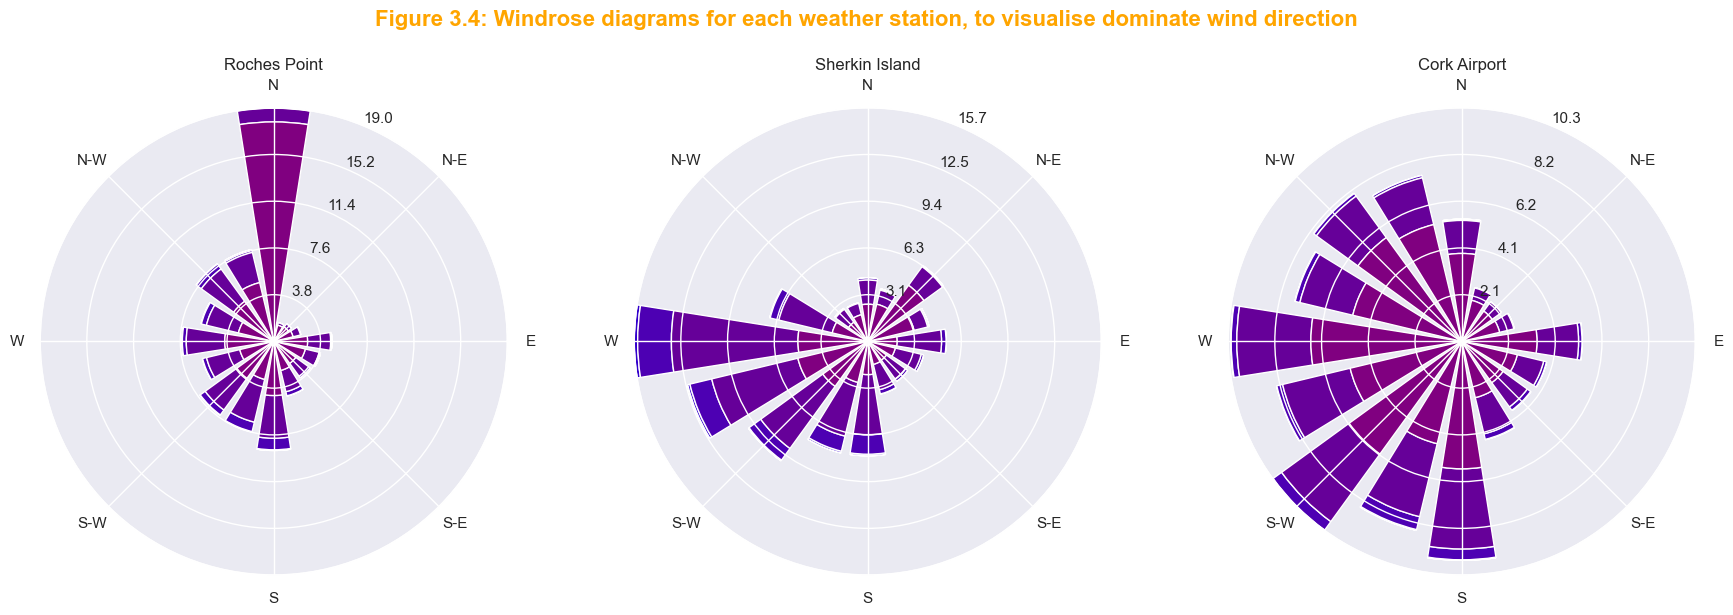

In [64]:
# Create a figure that displays a windrose chart of each of the weather stations.
def create_wind_rose(ax, df, title, cmap):
    # Extract wind speed and direction
    wind_speed = df['wdsp']
    wind_direction = df['wddir']

    # Create a wind rose plot with a gradient color
    ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white', cmap=cmap)
    ax.set_title(title)

# Create a figure with 3 subplots
fig = plt.figure(figsize=(18, 6))

# Define the colormap for the gradient from purple to blue
cmap = mcolors.LinearSegmentedColormap.from_list("purple_blue", ["purple", "blue"])

# Create wind rose plots for each DataFrame with the gradient colormap
ax1 = fig.add_subplot(131, projection='windrose')
create_wind_rose(ax1, dfrp, 'Roches Point', cmap)

ax2 = fig.add_subplot(132, projection='windrose')
create_wind_rose(ax2, dfs, 'Sherkin Island', cmap)

ax3 = fig.add_subplot(133, projection='windrose')
create_wind_rose(ax3, dfca, 'Cork Airport', cmap)

# Add an overall title
fig.suptitle('Figure 3.4: Windrose diagrams for each weather station, to visualise dominate wind direction', fontsize=16, fontweight='bold', color='orange')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('images/wind_rose_combined.png')
plt.show()

***
#### <span style="color:orange"> 3.4    Data Correlation <span>

Clarke (2021), defines [Pearson’s product moment correlation](https://practicaldatascience.co.uk/data-science/how-to-visualise-correlations-using-pandas-and-seaborn) as, “*a statistical method to measure the strength of the linear relationship between variables*”.

The model examines two variables, and returns an *r* value between -1 and 1, indicating the strength of their linear correlation. The closer the value is to 1, the higher the correlation. A positive *r* value indicates a positive relationship between the variables and a negative *r* value a negative relationship. An *r* value of 1 would indicate a perfect relationship between the analysed variables. We can assess variable correlation numerically using a table or visually using a heatmap. 

<div align="center">

| Correlation Co-efficient|Strength of Association  | 
|---------------          |--------------           |
| 0< *r* >0.39            | Weak                    |
| 0.4< *r* >0.59          | Moderate                |    
| 0.6< *r* >0.99          | Strong                  | 

Table 3.8; The classification of the strength of the correlation cooefficients for pairs variables.</div>

From table and figure, we can see that the only significant correlations are present 

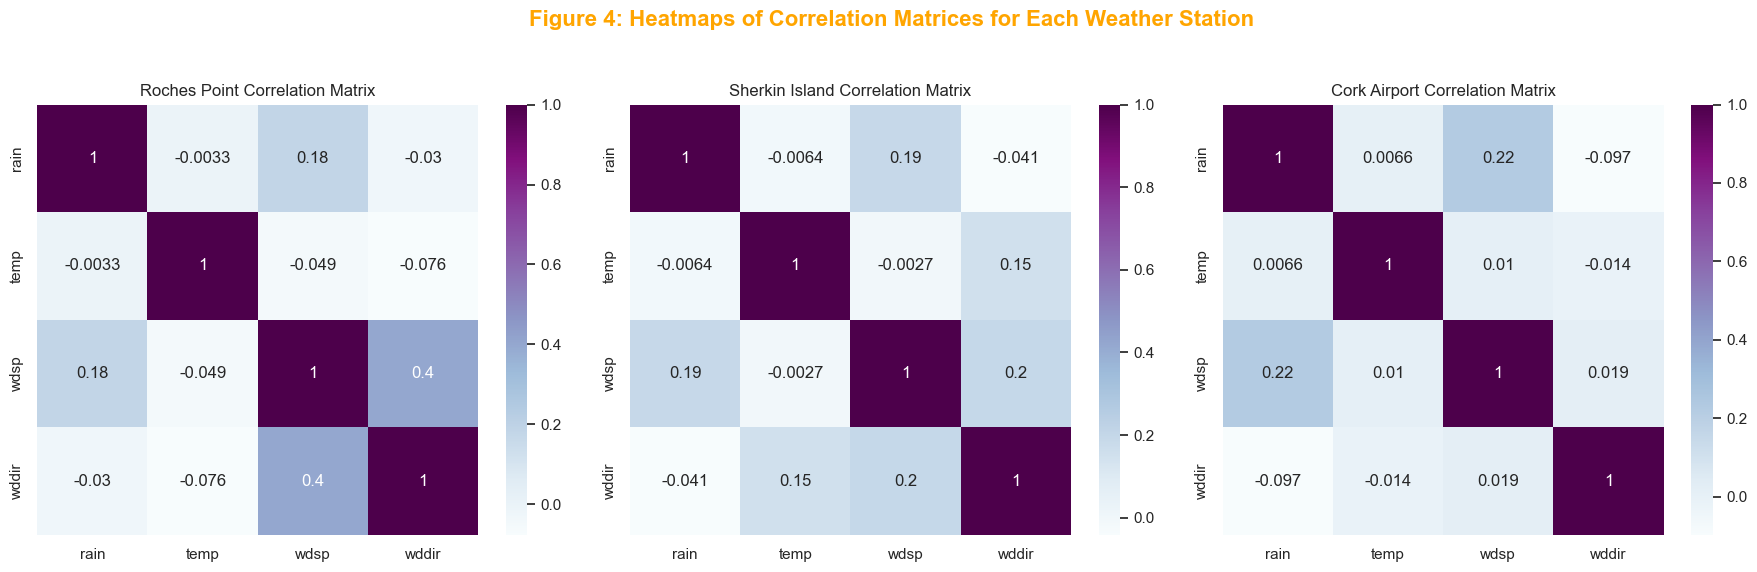

In [65]:
# Correlation
variables_to_analyze = ['rain', 'temp', 'wdsp', 'wddir']

# Calculate correlation matrices
corr_dfrp = dfrp[variables_to_analyze].corr()
corr_dfs = dfs[variables_to_analyze].corr()
corr_dfca = dfca[variables_to_analyze].corr()

# Create heatmaps showing the correlation matrices, using Seaborn
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create heatmaps for each correlation matrix with a blue-purple color scheme
# The colour scheme for the heatmap with sources from https://www.practicalpythonfordatascience.com/ap_seaborn_palette.
sns.heatmap(corr_dfrp, annot=True, cmap='BuPu', ax=axs[0])
axs[0].set_title('Roches Point Correlation Matrix')

sns.heatmap(corr_dfs, annot=True, cmap='BuPu', ax=axs[1])
axs[1].set_title('Sherkin Island Correlation Matrix')

sns.heatmap(corr_dfca, annot=True, cmap='BuPu', ax=axs[2])
axs[2].set_title('Cork Airport Correlation Matrix')

# Add an overall title
fig.suptitle('Figure 4: Heatmaps of Correlation Matrices for Each Weather Station', fontsize=16, fontweight='bold',color= 'orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('images/correlation_heatmaps.png')
plt.show()

From the correlation coefficents and the heatmaps generated (figure: ), we can see that neither rain, temparature nore winddirection have a strong relationships.

$$Power (W) = 1/2  .  ρ  . A  .  v3$$ 


- Power = Watts
- ρ (rho, a Greek letter) = density of the air in kg/m<sup>3</sup>
- A = cross-sectional area of the wind in m<sup>2</sup>
- v = velocity of the wind in m/s, [(Dutton, D.A, 2024)](https://www.e-education.psu.edu/emsc297/node/649)

If:
- The standard density of air is 1.225 kg/m<sup>3</sup> [(Helmenstine, A., 2024)](https://www.thoughtco.com/density-of-air-at-stp-607546).
- The turbine has a 24 m diameter, which means the radius is 12 m. Thus, the swept area of the turbine is: (pi)r2 = 3.14159(122) = 452.4 m<sup>2</sup>
-We will need to adject the wind speed units in the dataframes from [knots to m/s](https://en.wikipedia.org/wiki/Knot_(unit)#:~:text=The%20knot%20%28%2F%20n%C9%92t%20%2F%29%20is%20a%20unit,and%20Electronics%20Engineers%20%28IEEE%29%2C%20while%20kt%20is%20al), (where wind velocity (m/s)-= 0.514 wind speed (knots)).

Therefore:
Power (watts)= 0.5 * 1.225 * 452.4 * (wind speed, m/s)






In [66]:
# Converting windspeed into velocit (knots to meters/second)
# Add a new variable 'windvelo' based on the calculation of 'wdsp' 
dfrp['windvelo'] = dfrp['wdsp'] * 0.514
dfs['windvelo'] = dfs['wdsp'] * 0.514
dfca['windvelo'] = dfca['wdsp'] * 0.514

# Calculating the power of the wind
dfrp['power'] = 0.5 * 1.225 * 452.4 * dfrp['windvelo']
dfs['power'] = 0.5 * 1.225 * 452.4 * dfs['windvelo']
dfca['power'] = 0.5 * 1.225 * 452.4 * dfca['windvelo']

In [67]:
# Convert the date column to datetime format to enable plotting
dfrp['date'] = pd.to_datetime(dfrp['date'], format='%d/%m/%Y %H:%M')
dfs['date'] = pd.to_datetime(dfs['date'], format='%d/%m/%Y %H:%M')
dfca['date'] = pd.to_datetime(dfca['date'], format='%d/%m/%Y %H:%M')

# Extract year, month, day, and time into separate columns
# Roches Point weather station
dfrp['date_only'] = dfca['date'].dt.date
dfrp['year'] = dfrp['date'].dt.year
dfrp['month'] = dfrp['date'].dt.month
dfrp['day'] = dfrp['date'].dt.day
dfrp['time'] = dfrp['date'].dt.strftime('%H:%M')

# Sherkin Island weather station
dfs['date_only']= dfs['date'].dt.date
dfs['year'] = dfs['date'].dt.year
dfs['month'] = dfs['date'].dt.month
dfs['day'] = dfs['date'].dt.day
dfs['time'] = dfs['date'].dt.strftime('%H:%M')

# Cork Airport weather station
dfca['date_only']= dfca['date'].dt.date
dfca['year'] = dfca['date'].dt.year
dfca['month'] = dfca['date'].dt.month
dfca['day'] = dfca['date'].dt.day
dfca['time'] = dfca['date'].dt.strftime('%H:%M')

# Display the first few rows of the DataFrame
print('Table 3.10: The first two rows of each of the three weather station dataframes after data cleaning and transformation')
print("\nRoches Point Weather Station")
print(dfrp.head(3)) 
print("\nSherkin Weather Station")
print(dfs.head(3))
print("\nCork Airport Weather Station")
print(dfca.head(3))

Table 3.10: The first two rows of each of the three weather station dataframes after data cleaning and transformation

Roches Point Weather Station
                 date  rain  temp  wdsp  wddir     source  windvelo  \
0 1955-12-01 01:00:00   0.0  10.7  16.0  170.0  roches_pt     8.224   
1 1955-12-01 02:00:00   2.9   9.8  11.0  190.0  roches_pt     5.654   
2 1955-12-01 03:00:00   3.8   9.7   9.0  160.0  roches_pt     4.626   

        power   date_only  year  month  day   time  
0  2278.82928  1962-01-01  1955     12    1  01:00  
1  1566.69513  1962-01-01  1955     12    1  02:00  
2  1281.84147  1962-01-01  1955     12    1  03:00  

Sherkin Weather Station
                 date  rain  temp  wdsp  wddir   source  windvelo       power  \
0 2004-05-01 00:00:00   0.0  10.9   0.0    0.0  sherkin     0.000     0.00000   
1 2004-05-01 01:00:00   0.0  10.8  14.0  350.0  sherkin     7.196  1993.97562   
2 2004-05-01 02:00:00   0.0  11.1  12.0  350.0  sherkin     6.168  1709.12196   

    d

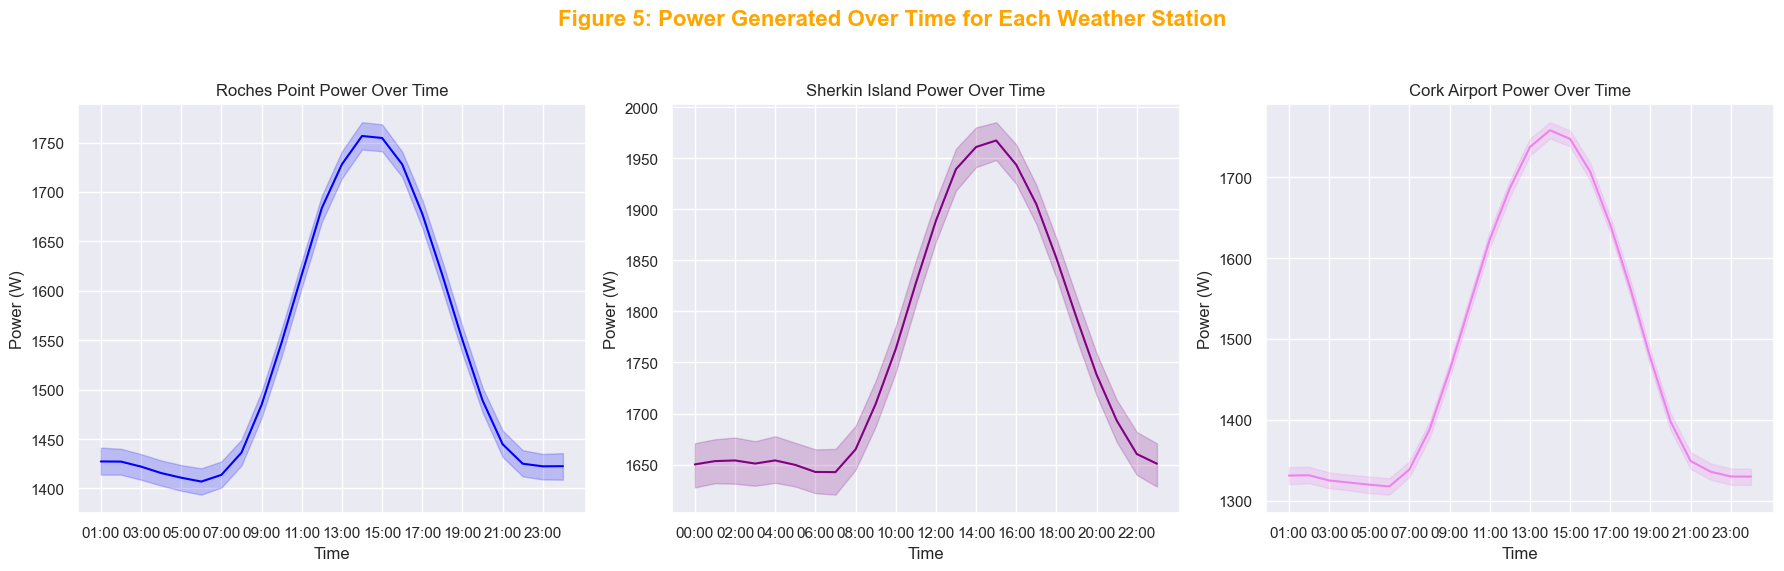

In [68]:
# Plot the power over time, across a day, for each weather station.
# Set the theme for the plots
sns.set_theme(style="darkgrid")

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the power over time for each weather station using a line plot
sns.lineplot(data=dfrp, x='time', y='power', ax=axs[0], color='blue')
axs[0].set_title('Roches Point Power Over Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Power (W)')
axs[0].set_xticks(range(0, 24, 2))

sns.lineplot(data=dfs, x='time', y='power', ax=axs[1], color='purple')
axs[1].set_title('Sherkin Island Power Over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Power (W)')
axs[1].set_xticks(range(0, 24, 2))

sns.lineplot(data=dfca, x='time', y='power', ax=axs[2], color='violet')
axs[2].set_title('Cork Airport Power Over Time')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Power (W)')
axs[2].set_xticks(range(0, 24, 2))

# Add an overall title
fig.suptitle('Figure 5: Power Generated Over Time for Each Weather Station', fontsize=16, fontweight='bold', color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot to a file
plt.savefig('images/power_over_time.png')
plt.show()



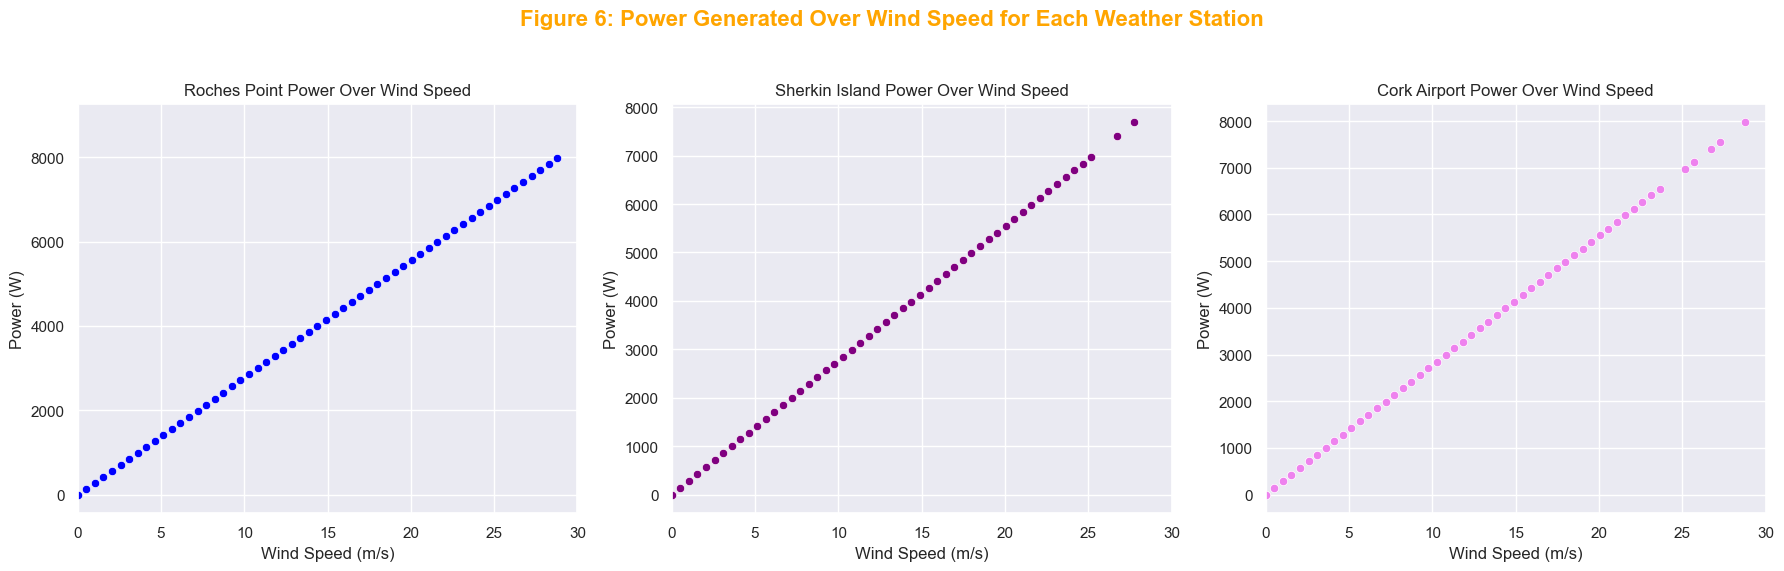

In [69]:
# Plot power over windspeed
# Set the theme for the plots
sns.set_theme(style="darkgrid")

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the power over wind speed for each weather station using a scatter plot
sns.scatterplot(data=dfrp, x='windvelo', y='power', ax=axs[0], color='blue')
axs[0].set_title('Roches Point Power Over Wind Speed')
axs[0].set_xlabel('Wind Speed (m/s)')
axs[0].set_ylabel('Power (W)')
axs[0].set_xlim(0, 30)

sns.scatterplot(data=dfs, x='windvelo', y='power', ax=axs[1], color='purple')
axs[1].set_title('Sherkin Island Power Over Wind Speed')
axs[1].set_xlabel('Wind Speed (m/s)')
axs[1].set_ylabel('Power (W)')
axs[1].set_xlim(0, 30)

sns.scatterplot(data=dfca, x='windvelo', y='power', ax=axs[2], color='violet')
axs[2].set_title('Cork Airport Power Over Wind Speed')
axs[2].set_xlabel('Wind Speed (m/s)')
axs[2].set_ylabel('Power (W)')
axs[2].set_xlim(0, 30)

# Add an overall title
fig.suptitle('Figure 6: Power Generated Over Wind Speed for Each Weather Station', fontsize=16, fontweight='bold', color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot to a file
plt.savefig('images/power_over_wind_speed.png')
plt.show()


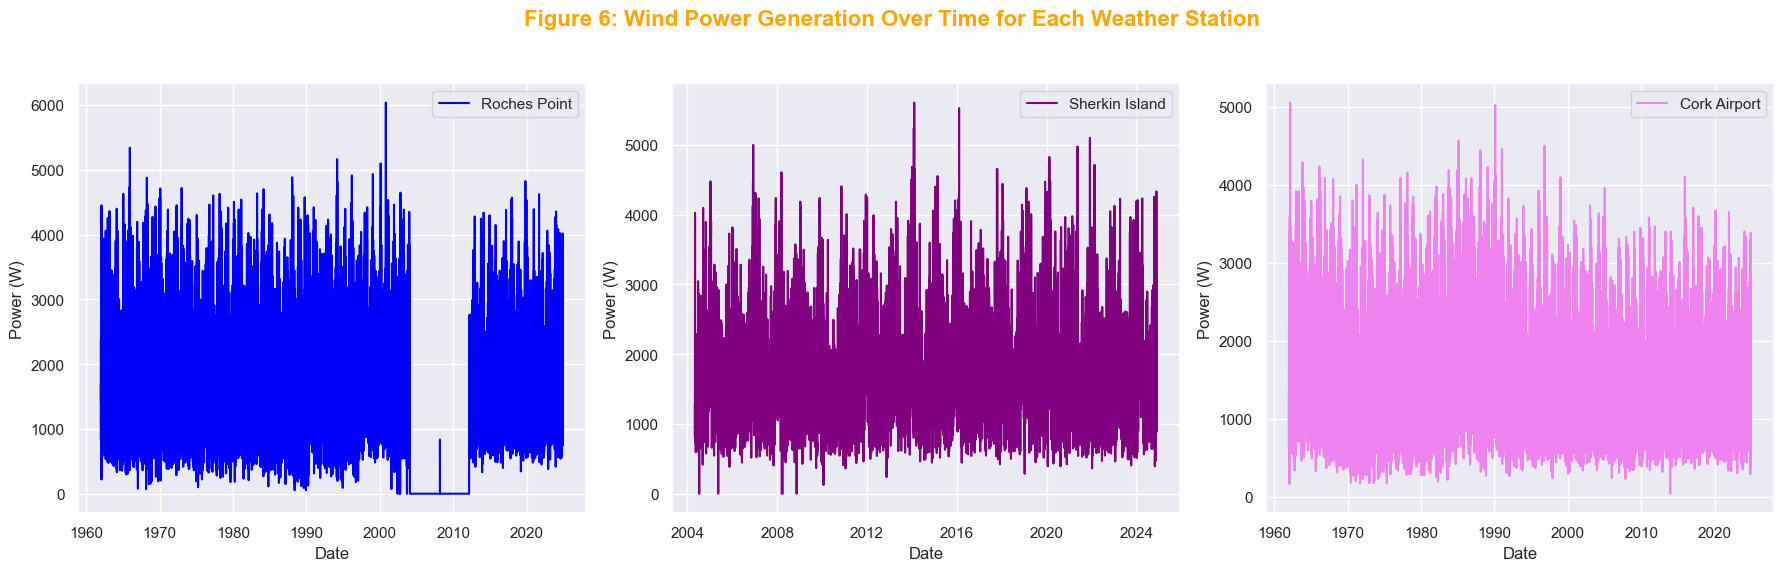

In [71]:
# Plotting the power generated by the wind over time for each weather station
# Set the theme for the plots
sns.set_theme(style="darkgrid")

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create line plots for each weather station
power_mean_dfrp.plot(ax=axs[0], label='Roches Point', color='blue')
power_mean_dfs.plot(ax=axs[1], label='Sherkin Island', color='purple')
power_mean_dfca.plot(ax=axs[2], label='Cork Airport', color='violet')

# Add labels and title
for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('Power (W)')
    ax.legend()

# Add an overall title
fig.suptitle('Figure 6: Wind Power Generation Over Time for Each Weather Station', fontsize=16, fontweight='bold', color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot to a file
plt.savefig('images/wind_power_generation_combined.png')

# Show the plot
plt.show()

## <span style="color:orange"> **5. References** <span>
***

Bankar R (2023) Supervised Learning with Scikit-learn. (URL: https://medium.com/analytics-vidhya/supervised-learning-with-scikit-learn-df617631216a) Accessed: 08/12/2024.

Chauhan A (2023) In-depth Handling/Imputation Techniques of Missing Values in Feature Transformation. (URL: https://towardsai.net/p/machine-learning/in-depth-handling-imputation-techniques-of-missing-values-in-feature-transformation). Accessed: 08/12/2024.

Dutton D A (2024) Wind Energy and Power Calculations (URL: https://www.e-education.psu.edu/emsc297/node/649). Accessed: 07/12/2024.

European Commission, Sustainable finance (URL: https://ec.europa.eu/info/business-economy-euro/banking-and-finance/sustainable-finance_en). Accessed: 07/12/2024.

Government of Ireland- Climate Action Plan (2023) (URL: https://www.gov.ie/en/publication/7bd8c-climate-action-plan-2023/). Accessed: 07/12/2024.

Grange S K (2014) Technical note: Averaging wind speeds and directions. (URL:https://www.researchgate.net/publication/262766424_Technical_note_Averaging_wind_speeds_and_directions). Accessed: 28/12/2024.

Had2know (2024) How to Test Whether Data is Normally Distributed (URL:https://www.had2know.org/academics/test-for-normality-statistics.html). Accessed: 28/12/2024.

Helmenstine A (2024) What Is the Density of Air at STP? (URL: https://www.thoughtco.com/density-of-air-at-stp-607546). Accessed: 07/12/2024.

Preet A (2022) Dealing with outliers using the Z-Score method (URL:https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/) Accessed: 15/12/2024.

SEAI, Energy Security in Ireland (2020) (URL: https://www.seai.ie/sites/default/files/publications/Energy-Security-in-Ireland-2020-.pdf). Accessed: 07/12/2024.

***
### <span style="color:orange"> End

In [ ]:
# Merge the DataFrames on the date column
combined_df = pd.merge(dfrp, dfs, on='date', how='outer', suffixes=('_roches_pt', '_sherkin'))
combined_df = pd.merge(combined_df, dfca, on='date', how='outer', suffixes=('', '_cork_airport'))

# Rename the columns from the Moorepark file
for col in dfmp.columns:
    if col != 'date' and col != 'source':
        combined_df.rename(columns={col: f"{col}_moore_pk"}, inplace=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

print("The three CSV files have been combined and saved as 'combined_file.csv'")


In [ ]:
# Convert object columns to integers
for col in combined_df.columns:
    if combined_df[col].dtype == 'object':
        combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce').fillna(0).astype(int)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

print("The object columns converted to integers, and saved as 'combined_file.csv'")